<a href="https://colab.research.google.com/github/ririssilvia/Machine-Learning-D4TI/blob/main/uts/UTS_Riris_Silvia_Zahri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS - Machine Learning**

**Nama :** Riris Silvia Zahri

**NIM :** 2241727029 

**Kelas :** D4TI-4J

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

#**Lembar Pengerjaan**

Lembar pengerjaan dimulai dari cell dibawah ini

# **Persiapan**

In [2]:
import numpy as np
import pandas as pd

#**Load Data**
Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan


In [5]:
data = pd.read_csv('tweet_emotions.csv')

data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


#**Visualisasi Data**

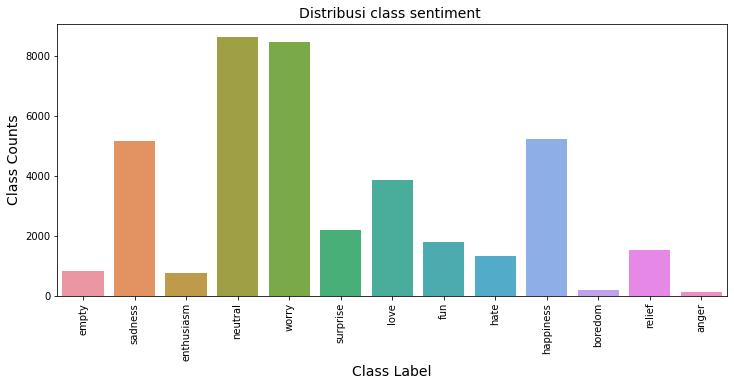

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,5))
sns.countplot(x='sentiment', data=data)
plt.title('Distribusi class sentiment ', fontsize=14)
plt.ylabel('Class Counts', fontsize=14)
plt.xlabel('Class Label', fontsize=14)
plt.xticks(rotation='vertical');

# **Pra Pengolahan Data**

## **Drop kolom**

In [7]:

data.drop(columns= "tweet_id",inplace = True)

In [8]:

%matplotlib inline
data.columns

Index(['sentiment', 'content'], dtype='object')

In [9]:
data.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


## **Inspeksi Data**

In [10]:
# Cek Jumlah Data Per Kelas
print(data['sentiment'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(data.info())
print('\n')

# Cek Statistik Deskriptif
print(data.describe())

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB
None


       sentiment                                            content
count      40000                                              40000
unique        13                                              39827
top      neutral  I just received a mothers day card from my lov...
freq        8638                                                 14


In [11]:
import re, string, unicodedata #regex library
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['content'] = data['content'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data['content'] = data['content'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['content'] = data['content'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['content'] = data['content'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data['content'] = data['content'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['content'] = data['content'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

print('Tokenizing Result : \n') 
print(data['content'].head())
print('\n\n\n')

Tokenizing Result : 

0     know  was listenin to bad habit earlier and  ...
1    Layin  bed with  headache ughhhhwaitin on your...
2                        Funeral ceremonygloomy friday
3                  wants to hang out with friends SOON
4    We want to trade with someone who has Houston ...
Name: content, dtype: object






In [12]:
data['content'] = data['content'].replace('@', '', regex=True)

data.head()

,sentiment,content
0,empty,know was listenin to bad habit earlier and ...
1,sadness,Layin bed with headache ughhhhwaitin on your...
2,sadness,Funeral ceremonygloomy friday
3,enthusiasm,wants to hang out with friends SOON
4,neutral,We want to trade with someone who has Houston ...


## Memisahkan Fitur dengan Label 


In [13]:
X = data['content'].values
y = data['sentiment'].values

# **Ekstraksi Fitur**

Ekstraksi fitur untuk setiap Content akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# membagi data ke training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

# **Training dan Evaluasi Model**

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.56396875
Hasil akurasi data test: 0.322125


# **Evaluasi**

In [17]:
print("Evaluasi")
print('Accuracy  = ', round(accuracy_score(y_test, y_pred_test)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, y_pred_test, average="weighted")*100,2),'%')
print('Precision = ', round(precision_score(y_test, y_pred_test, average="weighted")*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, y_pred_test, average="weighted")*100,2),'%')

print("")
print("Evaluasi")
print(classification_report(y_test,y_pred_test))  

Evaluasi
Accuracy  =  32.21 %
Recall    =  32.21 %
Precision =  31.19 %
F1-Score  =  27.41 %

Evaluasi


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        17
     boredom       0.00      0.00      0.00        30
       empty       0.00      0.00      0.00       174
  enthusiasm       0.00      0.00      0.00       153
         fun       0.00      0.00      0.00       347
   happiness       0.33      0.35      0.34      1019
        hate       0.50      0.00      0.01       259
        love       0.47      0.33      0.39       732
     neutral       0.33      0.41      0.36      1774
      relief       0.50      0.00      0.01       306
     sadness       0.30      0.16      0.21       995
    surprise       0.29      0.00      0.01       468
       worry       0.30      0.63      0.41      1726

    accuracy                           0.32      8000
   macro avg       0.23      0.15      0.13      8000
weighted avg       0.31      0.32      0.27      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Kesimpulan**

Dari hasil evaluasi menggunakan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat di simpulkan hasil akurasi data train yaitu: 0.60 dan hasil akurasi data test: 0.31